In [28]:
import os
import xarray as xr
import matplotlib.pyplot as plt

## Download NetCDF Data

The NWM Predictions dataset is published as NetCDF files, and available here: https://nomads.ncep.noaa.gov/pub/data/nccf/com/nwm/v2.2/.

This folder usually has a couple days of data. At the time of this writing, `nwm.20221017` was available.

Within that folder, we see a number of options:

```
analysis_assim/
analysis_assim_extend/
analysis_assim_extend_no_da/
analysis_assim_hawaii/
analysis_assim_hawaii_no_da/
analysis_assim_long/
analysis_assim_long_no_da/
analysis_assim_no_da/
analysis_assim_puertorico/
analysis_assim_puertorico_no_da/
forcing_analysis_assim/
forcing_analysis_assim_extend/
forcing_analysis_assim_hawaii/
forcing_analysis_assim_puertorico/
forcing_medium_range/
forcing_short_range/
forcing_short_range_hawaii/
forcing_short_range_puertorico/
long_range_mem1/
long_range_mem2/
long_range_mem3/
long_range_mem4/
medium_range_mem1/
medium_range_mem2/
medium_range_mem3/
medium_range_mem4/
medium_range_mem5/
medium_range_mem6/
medium_range_mem7/
medium_range_no_da/
short_range/
short_range_hawaii/
short_range_hawaii_no_da/
short_range_puertorico/
short_range_puertorico_no_da/
usgs_timeslices/
```

We begin with the short-range forecast, which has Streamflow Channel Routing files for 18 cycles at midnight:

```
nwm.t00z.short_range.channel_rt.f001.conus.nc
nwm.t00z.short_range.channel_rt.f002.conus.nc
nwm.t00z.short_range.channel_rt.f003.conus.nc
nwm.t00z.short_range.channel_rt.f004.conus.nc
nwm.t00z.short_range.channel_rt.f005.conus.nc
nwm.t00z.short_range.channel_rt.f006.conus.nc
nwm.t00z.short_range.channel_rt.f007.conus.nc
nwm.t00z.short_range.channel_rt.f008.conus.nc
nwm.t00z.short_range.channel_rt.f009.conus.nc
nwm.t00z.short_range.channel_rt.f010.conus.nc
nwm.t00z.short_range.channel_rt.f011.conus.nc
nwm.t00z.short_range.channel_rt.f012.conus.nc
nwm.t00z.short_range.channel_rt.f013.conus.nc
nwm.t00z.short_range.channel_rt.f014.conus.nc
nwm.t00z.short_range.channel_rt.f015.conus.nc
nwm.t00z.short_range.channel_rt.f016.conus.nc
nwm.t00z.short_range.channel_rt.f017.conus.nc
nwm.t00z.short_range.channel_rt.f018.conus.nc
```

Let's download these files:

In [17]:
PREDICTIONS_DATADIR = '/opt/data/nwm-predictions'

!mkdir -p /opt/data/nwm-predictions && cd /opt/data/nwm-predictions && seq -f 'https://nomads.ncep.noaa.gov/pub/data/nccf/com/nwm/v2.2/nwm.20221017/short_range/nwm.t00z.short_range.channel_rt.f%03g.conus.nc' 1 18 | xargs -P 0 -n 1 wget -q

os.listdir(PREDICTIONS_DATADIR)

['nwm.t00z.short_range.channel_rt.f001.conus.nc',
 'nwm.t00z.short_range.channel_rt.f017.conus.nc',
 'nwm.t00z.short_range.channel_rt.f016.conus.nc',
 'nwm.t00z.short_range.channel_rt.f010.conus.nc',
 'nwm.t00z.short_range.channel_rt.f011.conus.nc',
 'nwm.t00z.short_range.channel_rt.f007.conus.nc',
 'nwm.t00z.short_range.channel_rt.f006.conus.nc',
 'nwm.t00z.short_range.channel_rt.f014.conus.nc',
 'nwm.t00z.short_range.channel_rt.f015.conus.nc',
 'nwm.t00z.short_range.channel_rt.f009.conus.nc',
 'nwm.t00z.short_range.channel_rt.f008.conus.nc',
 'nwm.t00z.short_range.channel_rt.f003.conus.nc',
 'nwm.t00z.short_range.channel_rt.f002.conus.nc',
 'nwm.t00z.short_range.channel_rt.f004.conus.nc',
 'nwm.t00z.short_range.channel_rt.f005.conus.nc',
 'nwm.t00z.short_range.channel_rt.f018.conus.nc',
 'nwm.t00z.short_range.channel_rt.f013.conus.nc',
 'nwm.t00z.short_range.channel_rt.f012.conus.nc']

## Sample Downloaded Data

Before we do any further work with it, let's open one of the files in the dataset and take a look at it.

In [20]:
ds = xr.open_dataset(f'{PREDICTIONS_DATADIR}/nwm.t00z.short_range.channel_rt.f001.conus.nc')
ds

<xarray.Dataset>
Dimensions:         (time: 1, reference_time: 1, feature_id: 2776738)
Coordinates:
  * time            (time) datetime64[ns] 2022-10-17T01:00:00
  * reference_time  (reference_time) datetime64[ns] 2022-10-17
  * feature_id      (feature_id) int32 101 179 181 ... 1180001803 1180001804
Data variables:
    crs             |S1 ...
    streamflow      (feature_id) float64 ...
    nudge           (feature_id) float64 ...
    velocity        (feature_id) float64 ...
    qSfcLatRunoff   (feature_id) float64 ...
    qBucket         (feature_id) float64 ...
    qBtmVertRunoff  (feature_id) float64 ...
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v2.2
    featureType:                timeSeries
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    model_initialization_time:  2022-10-17_00:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2022-10-17_01:00:00
    ...                         ...
    model_configuration:        short_range
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...

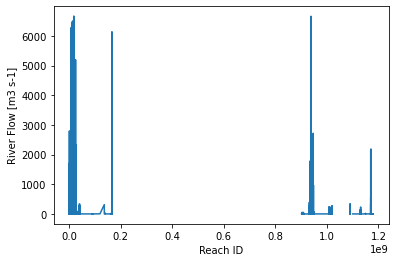

In [24]:
ds['streamflow'].plot()

## Convert to Zarr

Let's open the entire dataset, using [recommendations from XArray on reading multiple NetCDF files](https://docs.xarray.dev/en/stable/user-guide/io.html#reading-multi-file-datasets).


In [25]:
%%time
ds = xr.open_mfdataset(f'{PREDICTIONS_DATADIR}/*.nc',
                       parallel=True,
                       engine='h5netcdf',
                       concat_dim='time',
                       combine='nested',
                       data_vars=['streamflow'],
                       coords='minimal',
                       compat='override'
                      )
ds

CPU times: user 1.97 s, sys: 535 ms, total: 2.5 s
Wall time: 1.62 s


<xarray.Dataset>
Dimensions:         (time: 18, reference_time: 1, feature_id: 2776738)
Coordinates:
  * time            (time) datetime64[ns] 2022-10-17T01:00:00 ... 2022-10-17T...
  * reference_time  (reference_time) datetime64[ns] 2022-10-17
  * feature_id      (feature_id) int32 101 179 181 ... 1180001803 1180001804
Data variables:
    crs             |S1 ...
    streamflow      (time, feature_id) float64 dask.array<chunksize=(1, 2776738), meta=np.ndarray>
    nudge           (feature_id) float64 dask.array<chunksize=(2776738,), meta=np.ndarray>
    velocity        (feature_id) float64 dask.array<chunksize=(2776738,), meta=np.ndarray>
    qSfcLatRunoff   (feature_id) float64 dask.array<chunksize=(2776738,), meta=np.ndarray>
    qBucket         (feature_id) float64 dask.array<chunksize=(2776738,), meta=np.ndarray>
    qBtmVertRunoff  (feature_id) float64 dask.array<chunksize=(2776738,), meta=np.ndarray>
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v2.2
    featureType:                timeSeries
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    model_initialization_time:  2022-10-17_00:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2022-10-17_01:00:00
    ...                         ...
    model_configuration:        short_range
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...

Now let's convert it to Zarr.

In [27]:
%%time
ds.to_zarr(f'{PREDICTIONS_DATADIR}-channel_rt.zarr', mode='w')

CPU times: user 1.27 s, sys: 68.7 ms, total: 1.34 s
Wall time: 763 ms


### Compare Dataset Sizes

In [31]:
!du -sh /opt/data/*

217M	/opt/data/nwm-predictions
53M	/opt/data/nwm-predictions-channel_rt.zarr
